# Item Statistics

## Exploration of features of the tracks

In [1]:
import os
os.chdir('..')

import numpy as np
import modules.importer as imp

ICM_matrix = imp.create_ICM()

In [2]:
print(ICM_matrix)

[[ 6306.   449.   167.]
 [12085.  4903.   185.]
 [ 1885.  6358.   201.]
 ...
 [ 8202.  6200.   203.]
 [ 4789.  3720.   415.]
 [12529.    56.   252.]]


In [3]:
# Statistics 

'''
item_numbers, avg_length_track, more_frequent_artist
number_album_per_artist, number_tracks_per_album, avg_length_track_per_artist, avg_length_track_per_album
'''

item_numbers = np.shape(ICM_matrix)[0]
print ("Number of tracks: {}".format(item_numbers))


# track length duration 
avg_length_track = np.average(ICM_matrix[:,2])
max_length_track = np.max(ICM_matrix[:,2])
min_length_track = np.min(ICM_matrix[:,2])
std_length_track = np.std(ICM_matrix[:,2])

# percentiles
length_track_sorted = np.sort(ICM_matrix[:,2])
length_track_percentile = np.percentile(ICM_matrix[:,2], [25, 50, 75])

print ("Length track duration statistics\n")
print ("Average length:\t {},\nMax length:\t {},\nMin length:\t {},\nStandard deviation:\t {}".\
       format(avg_length_track, max_length_track, min_length_track, std_length_track))
print ("\nPercentiles:\n25%:\t {},\n50%:\t {},\n75%:\t {}".\
       format(length_track_percentile[0],length_track_percentile[1],\
              length_track_percentile[2]))


Number of tracks: 20635
Length track duration statistics

Average length:	 234.83455294402714,
Max length:	 2114.0,
Min length:	 0.0,
Standard deviation:	 75.87422964162312

Percentiles:
25%:	 190.0,
50%:	 225.0,
75%:	 267.0


## Invalid tracks
### duration feature = 0

In [4]:
number_valid_tracks = ICM_matrix[ICM_matrix[:,2]>0].shape[0]
number_of_invalid_tracks = item_numbers - number_valid_tracks 
invalid_tracks_ids = (np.where(ICM_matrix[:,2] == 0))[0]

print("Number of invalid track:\t {},\nNumber of valid track:\t {},\nPercentage:\t {}".format\
      (number_of_invalid_tracks, number_valid_tracks, (number_of_invalid_tracks / item_numbers) * 100))

print("Invalid track statistics")
print("Invalid track ids:\t {}\n".format(invalid_tracks_ids))
print("Id:\t {},\t Album_id: {},\t Artist_id: {},\t Duration: {}".format\
      (invalid_tracks_ids[0], ICM_matrix[invalid_tracks_ids[0], 0], \
       ICM_matrix[invalid_tracks_ids[0], 1], ICM_matrix[invalid_tracks_ids[0], 2]))
print("Id:\t {},\t Album_id: {},\t Artist_id: {},\t Duration: {}".format\
      (invalid_tracks_ids[1], ICM_matrix[invalid_tracks_ids[1], 0], \
       ICM_matrix[invalid_tracks_ids[1], 1], ICM_matrix[invalid_tracks_ids[1], 2]))


Number of invalid track:	 2,
Number of valid track:	 20633,
Percentage:	 0.00969227041434456
Invalid track statistics
Invalid track ids:	 [17679 18159]

Id:	 17679,	 Album_id: 7609.0,	 Artist_id: 602.0,	 Duration: 0.0
Id:	 18159,	 Album_id: 7609.0,	 Artist_id: 602.0,	 Duration: 0.0


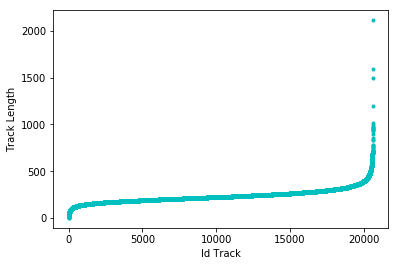

In [12]:
from matplotlib.pyplot import *

plot(length_track_sorted, 'c.')
ylabel("Track Length")
xlabel("Id Track")
show()

In [6]:
print("\nArtists statistics:\n")

artist_list = set(ICM_matrix[:,1])
number_of_artist = len (artist_list)

print("Number of artists:\t {}\n".format(number_of_artist))


Artists statistics:

Number of artists:	 6668



In [7]:
sliced_per_artist = []

for artist in artist_list:
    artist_tuple = []
    
    for row in ICM_matrix:
        if row[1] == artist:
            artist_tuple.append(row)
    
    sliced_per_artist.append(artist_tuple)

In [8]:
def get_album_number(artist_tuple):
    album_list = []
    for elem in artist_tuple:
        album_list.append(elem[0])
    return set(album_list)

def get_statistics_per_artist(sliced_list):
    result = []
    for elem in sliced_list:
        result.append([elem[0][1], len(elem), len(get_album_number(elem))]) 
    return np.array(result)    

# artist_id, num_of_track, num_of_albums        
artists_statistics = get_statistics_per_artist(sliced_per_artist)


Tracks per artist informations:

Average number of tracks x artist:	 3.094631073785243,
Max number of tracks x artist:	 84.0,
Min number of tracks x artist:	 1.0,
Standard deviation of number of tracks x artist:	 5.258285201110242


Percentiles:
25%:	 1.0,
50%:	 1.0,
75%:	 3.0,
95%:	 11.0

Artist with highest number of tracks:	2175



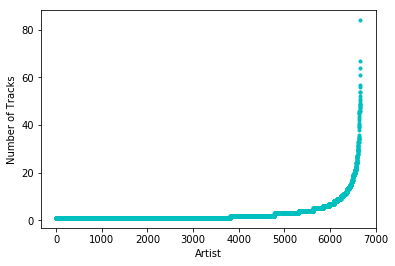

In [9]:
# statistics
avg_num_tracks_per_artist = np.average(artists_statistics[:,1])
num_tracks_of_bfrequent_artist = np.max(artists_statistics[:,1])
num_tracks_of_lfrequent_artist = np.min(artists_statistics[:,1])
sd_num_tracks_per_artist = np.std(artists_statistics[:,1])

track_bfrequent_artist = np.argmax(artists_statistics[:,1])

# percentiles
artist_ntrack = artists_statistics[:,1]
artist_ntrack_sorted = np.sort(artists_statistics[:,1])
artist_ntrack_percentile = np.percentile(artists_statistics[:,1], [25,50,75,95])

print("\nTracks per artist informations:\n")
print("Average number of tracks x artist:\t {},\nMax number of tracks x artist:\t {},\n"\
      "Min number of tracks x artist:\t {},\nStandard deviation of number of tracks x artist:\t {}\n"\
      .format(avg_num_tracks_per_artist, num_tracks_of_bfrequent_artist, \
              num_tracks_of_lfrequent_artist, sd_num_tracks_per_artist))
print ("\nPercentiles:\n25%:\t {},\n50%:\t {},\n75%:\t {},\n95%:\t {}".\
       format(artist_ntrack_percentile[0], artist_ntrack_percentile[1],\
              artist_ntrack_percentile[2], artist_ntrack_percentile[3]))

print("\nArtist with highest number of tracks:\t{}\n".format(track_bfrequent_artist))

# plot
plot(artist_ntrack_sorted, 'c.')
ylabel("Number of Tracks")
xlabel("Artist")
show()


Album per artist informations:

Average number of albums x artist:	 1.9518596280743852,
Max number of albums x artist:	 27.0,
Min number of albums x artist:	 1.0,
Standard deviation of number of albums x artist:	 2.001332299968399


Percentiles:
25%:	 1.0,
50%:	 1.0,
75%:	 2.0,
95%:	 6.0

Artist with highest number of albums:	4327



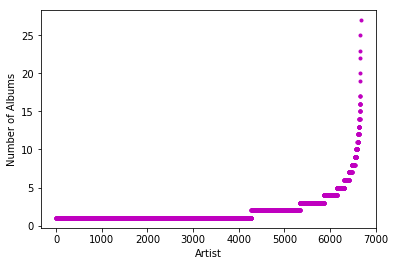

In [10]:
avg_num_album_per_artist = np.average(artists_statistics[:,2])
num_album_of_bfrequent_artist = np.max(artists_statistics[:,2])
num_album_of_lfrequent_artist = np.min(artists_statistics[:,2])
sd_num_album_per_artist = np.std(artists_statistics[:,2])

album_bfrequent_artist = np.argmax(artists_statistics[:,2])

# percentiles
artist_nalbum = artists_statistics[:,2]
artist_nalbum_sorted = np.sort(artists_statistics[:,2])
artist_nalbum_percentile = np.percentile(artists_statistics[:,2], [25,50,75,95])

print("\nAlbum per artist informations:\n")
print("Average number of albums x artist:\t {},\nMax number of albums x artist:\t {},\n"\
      "Min number of albums x artist:\t {},\nStandard deviation of number of albums x artist:\t {}\n"\
      .format(avg_num_album_per_artist, num_album_of_bfrequent_artist, \
              num_album_of_lfrequent_artist, sd_num_album_per_artist))
print ("\nPercentiles:\n25%:\t {},\n50%:\t {},\n75%:\t {},\n95%:\t {}".\
       format(artist_nalbum_percentile[0], artist_nalbum_percentile[1],\
              artist_nalbum_percentile[2], artist_nalbum_percentile[3]))

print("\nArtist with highest number of albums:\t{}\n".format(album_bfrequent_artist))

# plot
plot(artist_nalbum_sorted, 'm.')
ylabel("Number of Albums")
xlabel("Artist")
show()

In [11]:
print(artists_statistics[album_bfrequent_artist])
print(artists_statistics[track_bfrequent_artist])

[4327.   48.   27.]
[2175.   84.   19.]
